<a href="https://colab.research.google.com/github/BYEONGSEOKKIM/python/blob/main/statistics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision',3)

In [6]:
df = pd.read_csv('scores_em.csv', index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [8]:
scores_df = pd.DataFrame({'score':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [9]:
sum(scores)/len(scores)

55.000

In [10]:
scores_df.mean()

score    55.0
dtype: float64

In [11]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [12]:
n = len(sorted_scores)
if n%2 == 0:
  m0 = sorted_scores[n//2-1]
  m1 = sorted_scores[n//2]
  median = (m0 + m1)/2
else:
  median = sorted_scores[n+1//2 -1]
median

56.500

In [13]:
np.median(scores)

56.500

In [14]:
scores_df.median()

score    56.5
dtype: float64

In [15]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [17]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [19]:
np.mean(deviation)

0.000

In [20]:
np.mean(another_deviation)

0.000

In [21]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [22]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [23]:
np.mean(deviation**2)

86.000

In [24]:
np.var(scores)

86.000

In [25]:
scores_df.var()

score    95.556
dtype: float64

In [26]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [27]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [28]:
np.sqrt(np.var(scores, ddof = 0))

9.274

In [29]:
np.std(scores,ddof = 0)

9.274

In [30]:
np.max(scores) - np.min(scores)

28

In [31]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [32]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [33]:
z = (scores - np.mean(scores))/np.std(scores)

In [34]:
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [35]:
np.mean(z), np.std(z,ddof = 0)

(-0.000, 1.000)

In [36]:
z = 50 +10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [37]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [38]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [39]:
freq, _=np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [40]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)] 
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index = pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [41]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [42]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [43]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [44]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [45]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [46]:
import matplotlib.pyplot as plt

%matplotlib inline

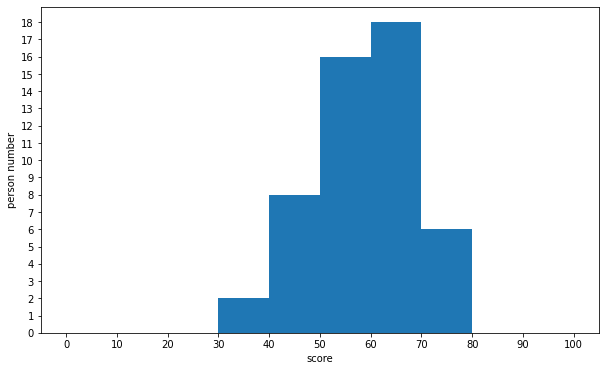

In [47]:
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(111)
freq, _, _=ax.hist(english_scores, bins=10, range=(0,100))

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

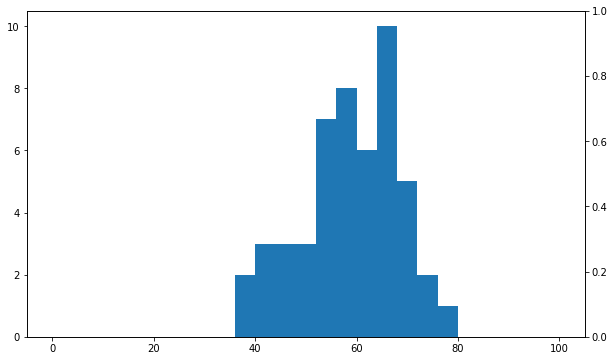

In [48]:
#@title 기본 제목 텍스트
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores / len(english_scores))
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range = (0,100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [i+(i+4)//2 for i in range(0,100,4)]

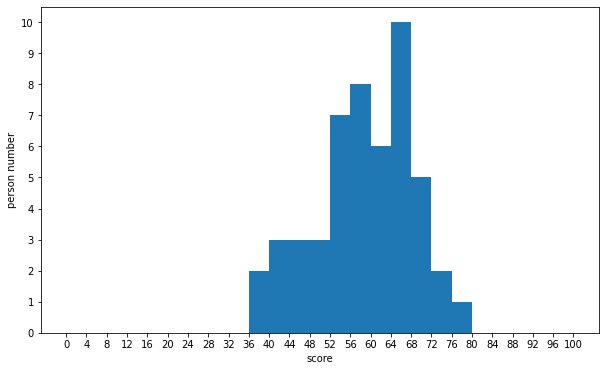

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

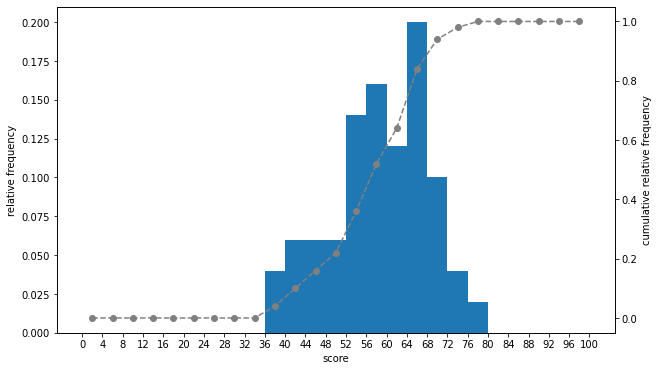

In [50]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

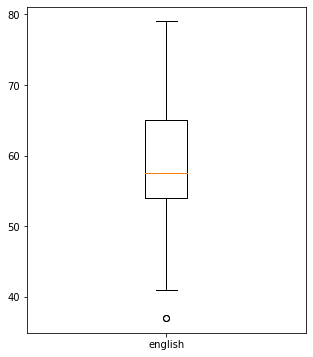

In [51]:
fig = plt.figure(figsize = (5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])
plt.show()

In [52]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)


In [53]:
df = pd.read_csv('scores_em.csv', index_col = 'student number')

In [54]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]
scores_df = pd.DataFrame({'english':en_scores,
'mathematics':ma_scores},
index=pd.Index(['A', 'B', 'C', 'D', 'E',
'F', 'G', 'H', 'I', 'J'],
name='student'))
scores_df


,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [65]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
  summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
  summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
  summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [66]:
summary_df['product of deviations'].mean()

62.800

In [68]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [69]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [70]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [71]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof = 0)

(86.000, 68.440)

In [72]:
np.cov(en_scores, ma_scores, ddof = 0)[0,1]/\
  (np.std(en_scores)*np.std(ma_scores))

0.819

In [73]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [74]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


In [75]:
import matplotlib.pyplot as plt

%matplotlib inline

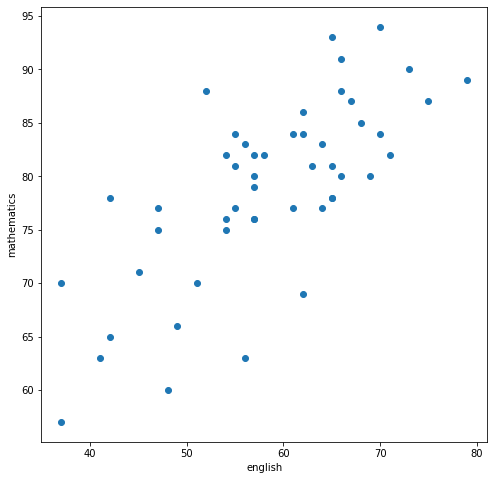

In [76]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

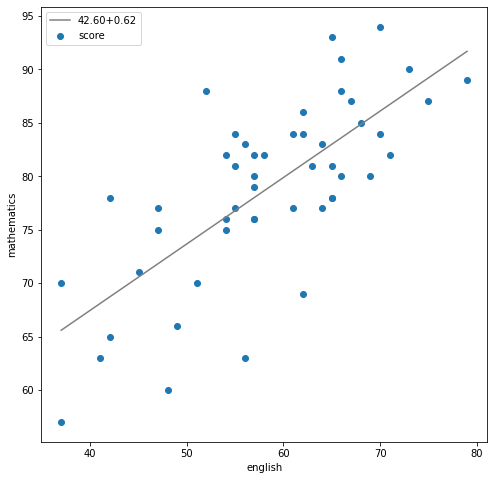

In [77]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color = 'gray',
        label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}')
ax.legend(loc = 'upper left')

plt.show()

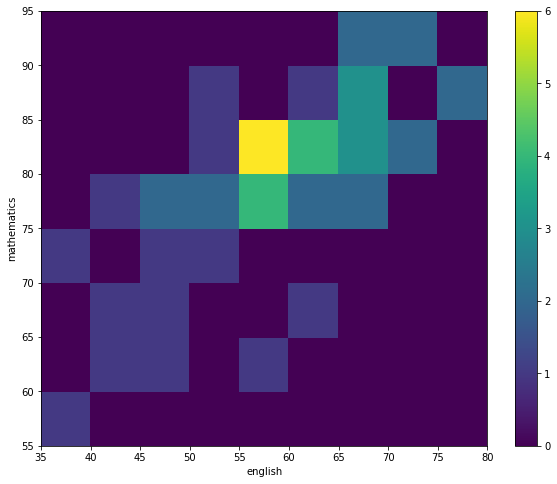

In [78]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins = [9,8], range = [(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()

In [80]:
anscombe_data = np.load('anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [81]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
'Y_variance', 'X&Y_correlation',
'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
  dataX = data[:, 0]
  dataY = data[:, 1]
  poly_fit = np.polyfit(dataX, dataY, 1)
  stats_df[f'data{i+1}'] =\
    [f'{np.mean(dataX):.2f}',
    f'{np.var(dataX):.2f}',
    f'{np.mean(dataY):.2f}',
    f'{np.var(dataY):.2f}',
    f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
    f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


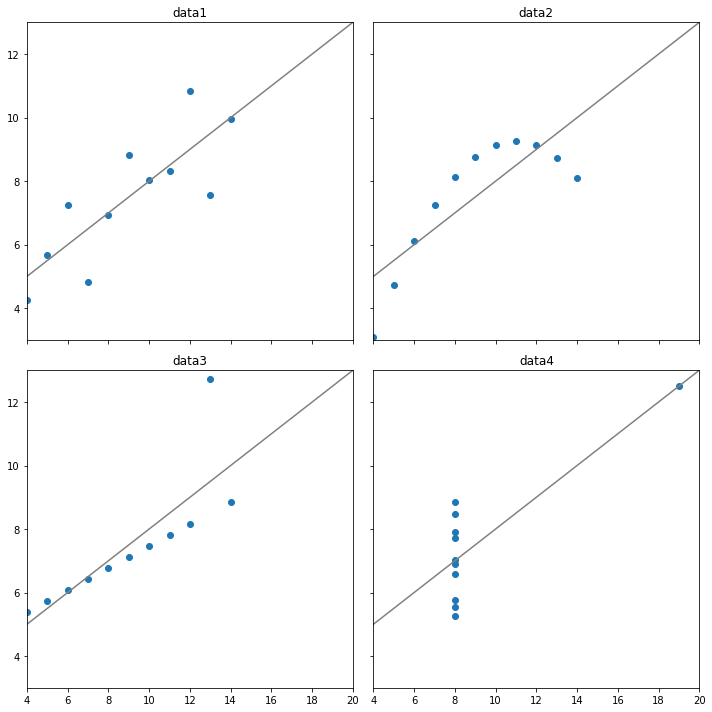

In [83]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
  poly_fit = np.polyfit(data[:,0], data[:,1], 1)
  poly_1d = np.poly1d(poly_fit)
  ys = poly_1d(xs)
# 그리는 영역을 선택
  ax = axes[i//2, i%2]
  ax.set_xlim([4, 20])
  ax.set_ylim([3, 13])
# 타이틀을 부여
  ax.set_title(f'data{i+1}')
  ax.scatter(data[:,0], data[:,1])
  ax.plot(xs, ys, color='gray')
# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()